<a href="https://colab.research.google.com/github/yunmokoo/SPY-Forecast_MARS_LSTM/blob/main/SPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests > make_outputrerquest.txt 2>&1
!pip install yfinance > make_outputyfinance.txt 2>&1
!pip install transformers > make_outputtransformers.txt 2>&1
!pip install xformers > make_outputxformers.txt 2>&1


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz > wget_output.txt 2>&1
!tar -xzvf ta-lib-0.4.0-src.tar.gz > tar_output.txt 2>&1
%cd ta-lib
!./configure --prefix=/usr > config_output.txt 2>&1
!make > make_outputtalib.txt 2>&1
!make install > makeInstall_output.txt 2>&1
!pip install TA-Lib > pipInstall_output.txt 2>&1

/content/ta-lib


In [ ]:
import requests
import json
import yfinance as yf
#import talib

import tensorflow as tf
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from transformers import *
from transformers import GenerationMixin
from transformers import TFGenerationMixin
from transformers import FlaxGenerationMixin

from sklearn.preprocessing import MinMaxScaler

import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import torch.optim as optim

from transformers import DistilBertTokenizer, DistilBertModel

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(


From TA-lib...

1. MA                  All Moving Average
2. BBANDS              Bollinger Bands
3. MACD                Moving Average Convergence/Divergence
4. SMA                 Simple Moving Average
5. EMA                 Exponential Moving Average

In [ ]:
df = pd.DataFrame(yf.download("QQQ", start="2001-01-01", end="2023-01-01"))
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,58.562500,58.687500,52.437500,53.437500,45.814552,62514100
2001-01-03,52.187500,65.250000,52.156250,62.437500,53.530678,118175700
2001-01-04,61.625000,63.625000,60.234375,61.312500,52.566154,58465400
2001-01-05,61.312500,61.312500,56.000000,56.625000,48.547333,68782000
2001-01-08,56.312500,57.500000,53.515625,57.250000,49.083187,55576500
...,...,...,...,...,...,...
2022-12-23,265.470001,268.040009,263.529999,267.359985,266.581055,39373600
2022-12-27,266.739990,266.850006,263.029999,263.579987,262.812073,38009000
2022-12-28,263.170013,265.470001,259.730011,260.100006,259.342224,47139000


testing from here


In [ ]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized

,Open,High,Low,Close,Adj Close,Volume
0,0.155737,0.151608,0.147845,0.148199,0.079748,0.006263
1,0.146771,0.160983,0.148074,0.163306,0.089547,0.018587
2,0.162880,0.159688,0.161140,0.159758,0.087246,0.006818
3,0.159308,0.155190,0.151818,0.149115,0.080342,0.011073
4,0.150570,0.146806,0.148150,0.151556,0.081925,0.003829
...,...,...,...,...,...,...
5530,0.757896,0.763598,0.760294,0.768555,0.791514,0.065175
5531,0.765531,0.763818,0.764256,0.764868,0.787902,0.055703
5532,0.761981,0.764403,0.756358,0.753296,0.776566,0.077915
5533,0.757848,0.766745,0.762862,0.769849,0.792781,0.073373


# 8/1

[*********************100%***********************]  1 of 1 completed
Epoch 1/50
139/139 [==============================] - 18s 6ms/step - loss: 6.2072e-04
Epoch 2/50
139/139 [==============================] - 1s 6ms/step - loss: 2.1560e-05
Epoch 3/50
139/139 [==============================] - 1s 7ms/step - loss: 1.7194e-05
Epoch 4/50
139/139 [==============================] - 1s 8ms/step - loss: 2.9689e-05
Epoch 5/50
139/139 [==============================] - 1s 8ms/step - loss: 2.2044e-05
Epoch 6/50
139/139 [==============================] - 1s 8ms/step - loss: 2.3279e-05
Epoch 7/50
139/139 [==============================] - 1s 6ms/step - loss: 2.4559e-05
Epoch 8/50
139/139 [==============================] - 1s 9ms/step - loss: 2.3440e-05
Epoch 9/50
139/139 [==============================] - 1s 6ms/step - loss: 1.4387e-05
Epoch 10/50
139/139 [==============================] - 1s 6ms/step - loss: 1.4448e-05
Epoch 11/50
139/139 [==============================] - 1s 7ms/step - loss: 2.98

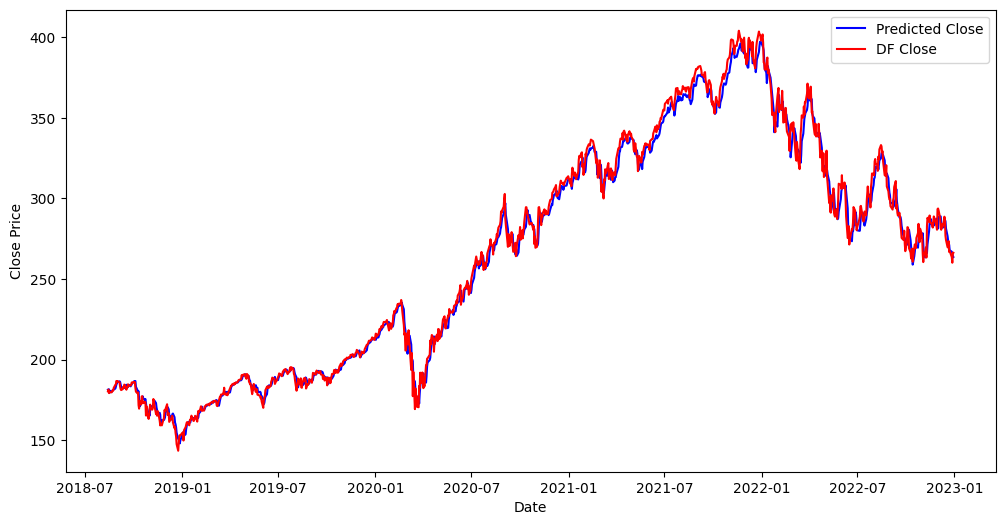

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Download historical stock data and create DataFrame
df = pd.DataFrame(yf.download("QQQ", start="2001-01-01", end="2023-01-01"))
features = df[['Open', 'High', 'Low', 'Volume']]

target = df['Close']

scaler = MinMaxScaler()

# Feature scaling
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

def initiate_seq(data, target, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(target[i + seq_len])
    return np.array(X), np.array(y)

seq_len = 10

X, y = initiate_seq(features_scaled, target_scaled, seq_len)

# Data split
train_size = int(0.8 * len(X))  # Use 80% of data for training
X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

# LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_len, 4)))  # 4 input features: Open, High, Low
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Model training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Prediction and inverse scaling
predicted_scaled = model.predict(X_test)
predicted_close = scaler.inverse_transform(predicted_scaled)
actual_close = scaler.inverse_transform(y_test)

# Plot predicted and raw df
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(predicted_close):], predicted_close[:, 0], label='Predicted Close', color='b')
plt.plot(df.index[-len(actual_close):], df['Close'][-len(actual_close):], label='DF Close', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
Epoch 1/50
139/139 [==============================] - 5s 6ms/step - loss: 0.0051
Epoch 2/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0035
Epoch 3/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 4/50
139/139 [==============================] - 1s 8ms/step - loss: 0.0035
Epoch 5/50
139/139 [==============================] - 1s 8ms/step - loss: 0.0036
Epoch 6/50
139/139 [==============================] - 1s 9ms/step - loss: 0.0036
Epoch 7/50
139/139 [==============================] - 1s 7ms/step - loss: 0.0035
Epoch 8/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0035
Epoch 9/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 10/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0034
Epoch 11/50
139/139 [==============================] - 1s 7ms/step - loss: 0.0035
Epoch 12/50
139/139 [=================

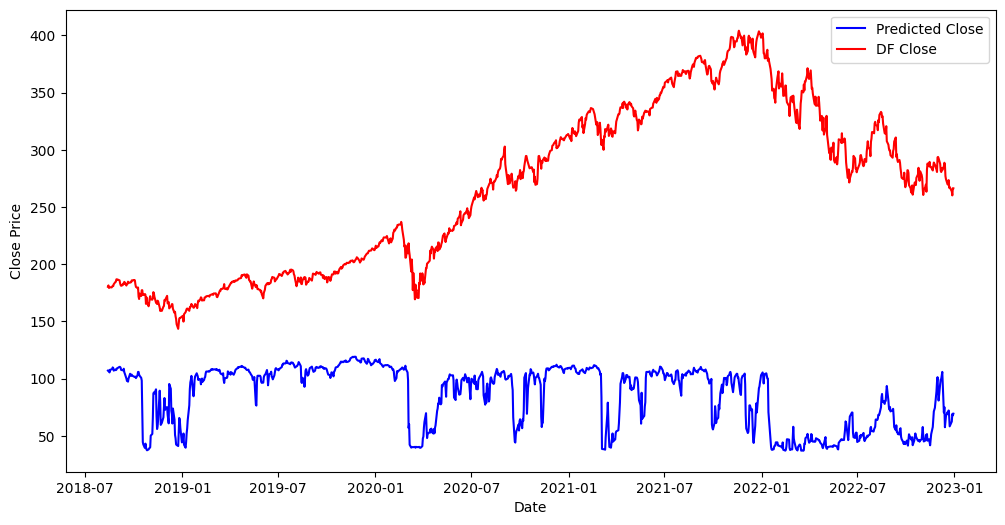

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Download historical stock data and create DataFrame
df = pd.DataFrame(yf.download("QQQ", start="2001-01-01", end="2023-01-01"))
#features = df[['Open', 'High', 'Low', 'Volume']]
features = df[['Volume']]
target = df['Close']

scaler = MinMaxScaler()

# Feature scaling
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

def initiate_seq(data, target, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(target[i + seq_len])
    return np.array(X), np.array(y)

seq_len = 10

X, y = initiate_seq(features_scaled, target_scaled, seq_len)

# Data split
train_size = int(0.8 * len(X))  # Use 80% of data for training
X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

# LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_len, 1)))  # 4 input features: Open, High, Low
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Model training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Prediction and inverse scaling
predicted_scaled = model.predict(X_test)
predicted_close = scaler.inverse_transform(predicted_scaled)
actual_close = scaler.inverse_transform(y_test)

# Plot predicted and raw df
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(predicted_close):], predicted_close[:, 0], label='Predicted Close', color='b')
plt.plot(df.index[-len(actual_close):], df['Close'][-len(actual_close):], label='DF Close', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()